In [1]:
# NAME: SHRUTHI PASUMARTHI 
# STUDENT ID: 801218392
# HOMEWORK 4 QUESTION 1   

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler

C:\Users\Shruthi\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Shruthi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Shruthi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
#Loading the breast cancer dataset
breast = load_breast_cancer() 

In [4]:
#To check the dimensions of the dataset
breast_data = breast.data 
breast_data.shape

(569, 30)

In [5]:
#Viewing the dataset
breast_input = pd.DataFrame(breast_data)
breast_input.head() 

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#Naming the labels-Benign and Malignant as the target 
breast_labels = breast.target 

In [7]:
#Viewing the shape of the target/labels
breast_labels.shape

(569,)

In [8]:
#Making it into a 2d array
labels = np.reshape(breast_labels,(569,1)) 

In [9]:
#Concatenating the data and the labels together
final_breast_data = np.concatenate([breast_data,labels],axis=1) 

In [10]:
#Viewing the shape of the final concatenated data
final_breast_data.shape

(569, 31)

In [11]:
breast_dataset = pd.DataFrame(final_breast_data)

In [12]:
features = breast.feature_names 
features 

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
features_labels = np.append(features,'label')

In [14]:
breast_dataset.columns = features_labels 

In [15]:
breast_dataset.head() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [16]:
#Replacing 0 and 1 with Benign and Malignant respectively
breast_dataset['label'].replace(0, 'Benign',inplace=True) 
breast_dataset['label'].replace(1, 'Malignant',inplace=True) 

In [17]:
breast_dataset.tail() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [18]:
#Splitting the data into x- input and y-labels
X = breast_dataset.iloc[: , 0:30].values
y = breast_dataset.iloc[: , 30].values

In [20]:
#To get the performance over all the classes, I had to put the PCA feature extraction the the Logistic regression into a 
#for loop. This gave me the accuracy, precision and recall values for all the 1-30 feature extractions. 

n = range(1,31)
#Creating 0 arrays for accuracy, precision and recall scores
ac = np.zeros(31)
pc = np.zeros(31)
rc = np.zeros(31)
for k in n: 
    #Scaling the data to do the Logistic regression
    sc = MinMaxScaler()
    x = sc.fit_transform(X)
    #Doing the PCA feature extraction for k columns
    pca = PCA(n_components=k) 
    principalComponents = pca.fit_transform(x) 
    principalDf = pd.DataFrame(data = principalComponents)
    finalDf = pd.concat([principalDf, breast_dataset[['label']]], axis = 1)
    x = pd.DataFrame(principalDf.to_numpy())
    #Splitting the train and test data
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, 
                                                        random_state=None, shuffle = True)
    #Running the Support vector machines
    clf = svm.SVC()
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    #Saving the accuracy, precision and recall score in the array for each loop
    pos_label = ['Benign', 'Malignant']
    ac[k] = accuracy_score(Y_test, Y_pred)
    pc[k] = precision_score(Y_test, Y_pred, pos_label="Benign")
    rc[k] = recall_score(Y_test, Y_pred, pos_label="Benign")
    print("For %d extracted features, the accuracy is: %.2f, the precision is: %.2f, the recall is:%.2f"
          % (k, ac[k], pc[k], rc[k]))

For 1 extracted features, the accuracy is: 0.94, the precision is: 0.98, the recall is:0.87
For 2 extracted features, the accuracy is: 0.92, the precision is: 0.90, the recall is:0.88
For 3 extracted features, the accuracy is: 0.97, the precision is: 0.97, the recall is:0.95
For 4 extracted features, the accuracy is: 0.95, the precision is: 0.93, the recall is:0.93
For 5 extracted features, the accuracy is: 0.97, the precision is: 0.95, the recall is:0.97
For 6 extracted features, the accuracy is: 0.98, the precision is: 0.98, the recall is:0.98
For 7 extracted features, the accuracy is: 0.98, the precision is: 1.00, the recall is:0.95
For 8 extracted features, the accuracy is: 0.98, the precision is: 0.98, the recall is:0.98
For 9 extracted features, the accuracy is: 0.97, the precision is: 0.98, the recall is:0.95
For 10 extracted features, the accuracy is: 0.99, the precision is: 1.00, the recall is:0.98
For 11 extracted features, the accuracy is: 0.99, the precision is: 1.00, the r

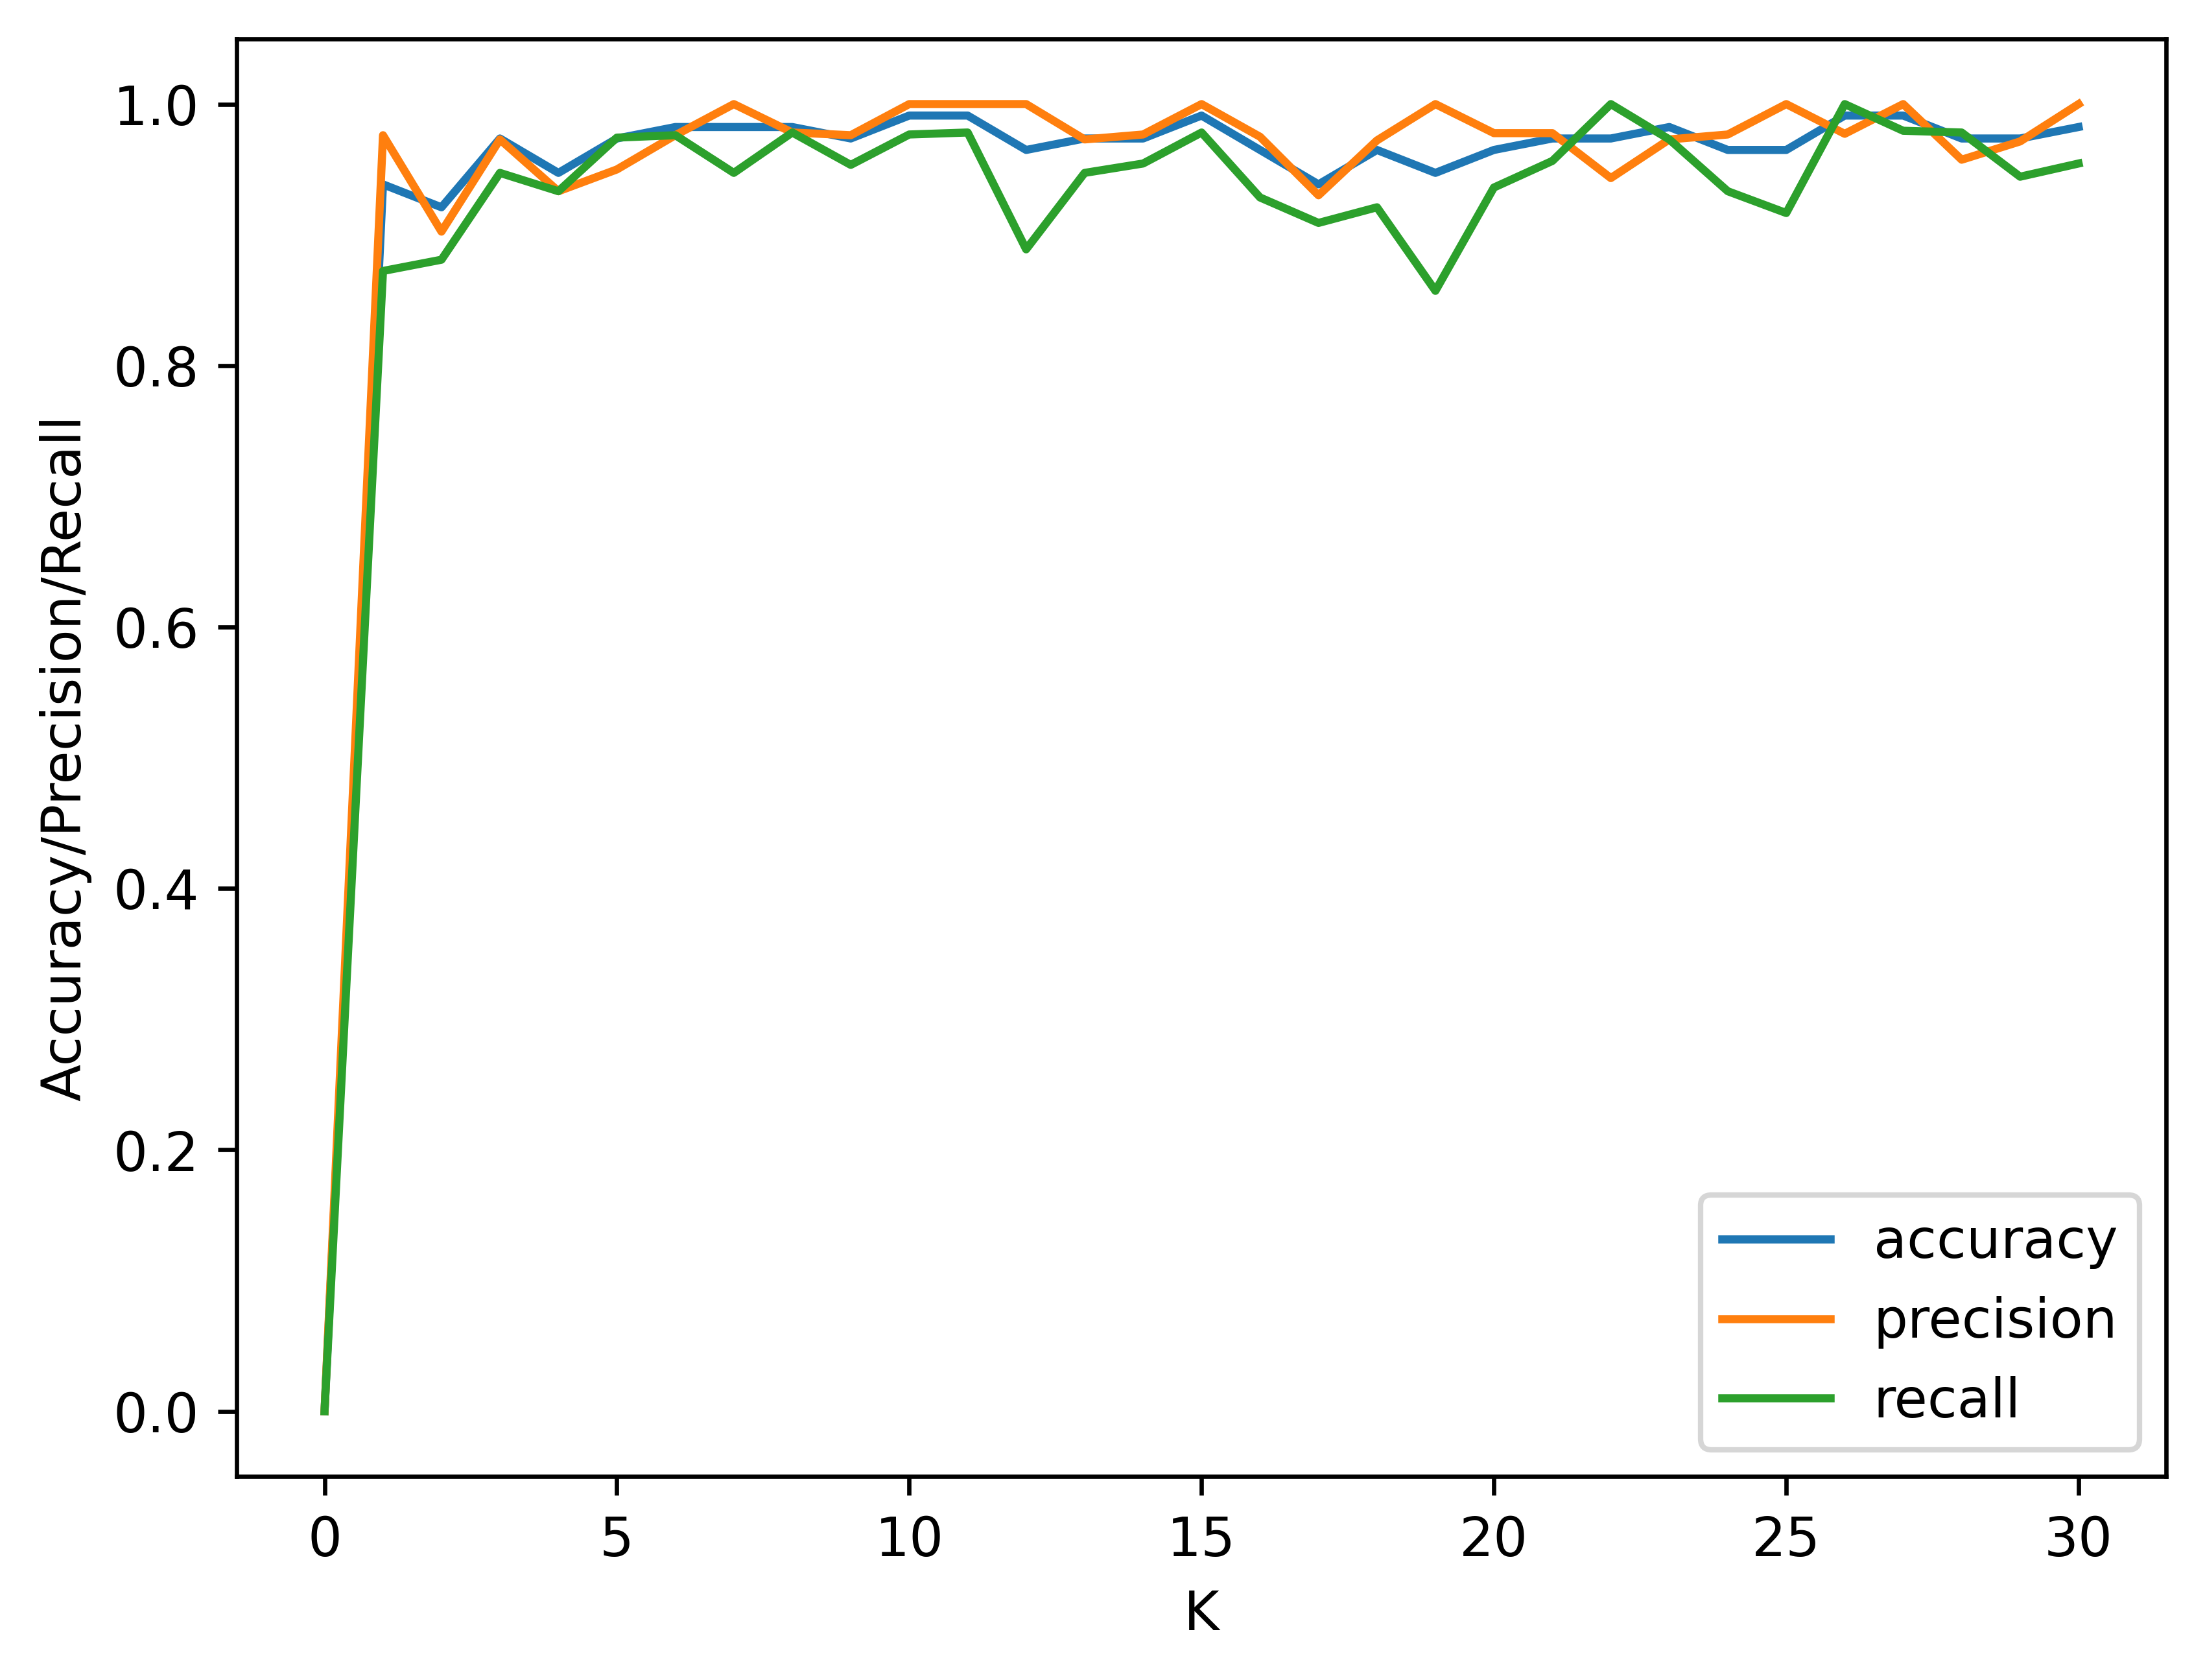

In [21]:
#Plotting the values 
xaxis = range(0,31)
fig = plt.figure(dpi=600)
plt.xlabel("K")
plt.ylabel("Accuracy/Precision/Recall")
plt.plot(xaxis, ac, label='accuracy') # <2>
plt.plot(xaxis, pc, label='precision')
plt.plot(xaxis, rc, label='recall')
plt.legend(loc='lower right', frameon=True)